# Table of Contents

01. Import Libraries
02. Import Data
03. Exercise 4.9


# 01. Import Libraries

In [12]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Import Data

In [16]:
path = r'C:\Users\cmkep\Cathy\2022 Instacart Basket Analysis'

In [17]:
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_derived_grouped(2).pkl'))

# 03. Exercise 4.9

<AxesSubplot:>

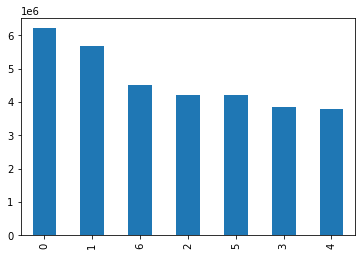

In [8]:
#create bar chart
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

<AxesSubplot:>

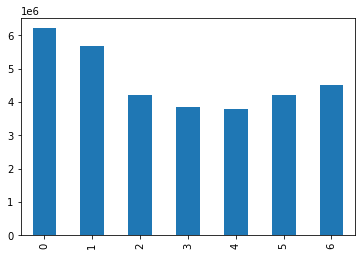

In [9]:
#sort by index
ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

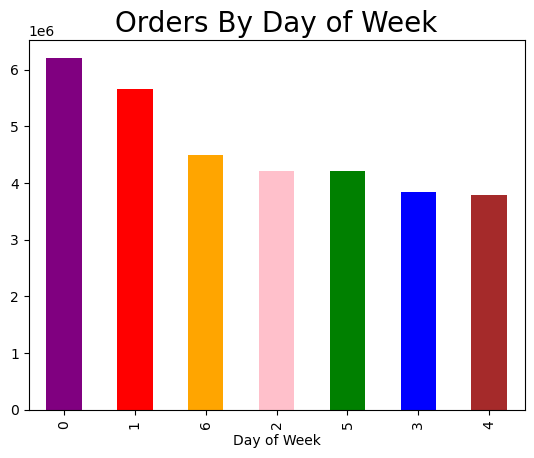

In [23]:
#add color
bar_dow = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color= ['purple','red','orange','pink','green','blue','brown'])
plt.title('Orders By Day of Week', fontsize = 20)
plt.xlabel("Day of Week")
plt.show()

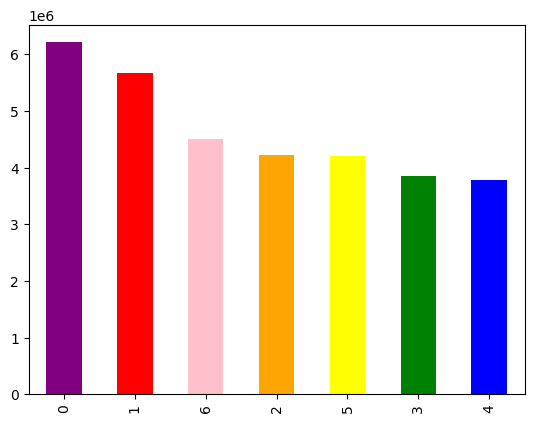

In [22]:
#save image as "bar"
bar_dow = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [24]:
#save image to Visualizations folder
bar_dow.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow_2.png'))

<AxesSubplot:ylabel='Frequency'>

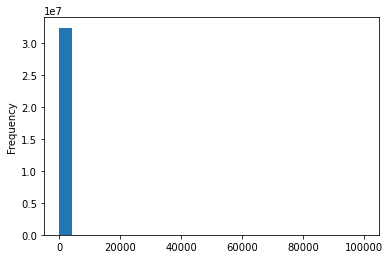

In [14]:
#create histogram
ords_prods_merge['prices'].plot.hist(bins = 25)

<AxesSubplot:xlabel='prices', ylabel='prices'>

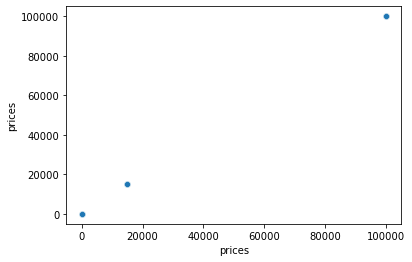

In [15]:
#exploratory scatterplot to check for outliers
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [16]:
#check for supermarket outlier prices above 100
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,prices,_merge,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,Spending_flag,order_frequency,frequency_flag
10030345,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,...,14900.0,both,High-range product,Regularly busy,Most Orders,40,Regular customer,High Spender,5.0,Frequent customer
10030346,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,14900.0,both,High-range product,Regularly busy,Most Orders,40,Regular customer,High Spender,5.0,Frequent customer
10030347,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,...,14900.0,both,High-range product,Regularly busy,Fewest Orders,4,New customer,High Spender,12.0,Regular customer
10030348,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,14900.0,both,High-range product,Busiest days,Most Orders,4,New customer,High Spender,12.0,Regular customer
10030349,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,...,14900.0,both,High-range product,Busiest days,Average Orders,16,Regular customer,High Spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29193268,2249946,204099,29,0,8,4.0,33664,1,0,2 % Reduced Fat Milk,...,99999.0,both,High-range product,Busiest days,Most Orders,39,Regular customer,High Spender,4.0,Frequent customer
29193269,2363282,204099,31,0,9,2.0,33664,1,1,2 % Reduced Fat Milk,...,99999.0,both,High-range product,Busiest days,Most Orders,39,Regular customer,High Spender,4.0,Frequent customer
29193270,3181945,204395,13,3,15,8.0,33664,25,0,2 % Reduced Fat Milk,...,99999.0,both,High-range product,Least busy,Most Orders,15,Regular customer,High Spender,5.0,Frequent customer
29193271,2486215,205227,7,3,20,4.0,33664,8,0,2 % Reduced Fat Milk,...,99999.0,both,High-range product,Least busy,Average Orders,12,Regular customer,High Spender,12.0,Regular customer


In [17]:
#mark outliers as missing values to makes sense of analysis
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [18]:
 ords_prods_merge['prices'].max()

25.0

<AxesSubplot:ylabel='Frequency'>

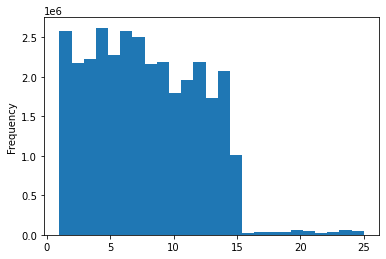

In [19]:
#remake histogram with outliers removed
ords_prods_merge['prices'].plot.hist(bins = 25)

<AxesSubplot:ylabel='Frequency'>

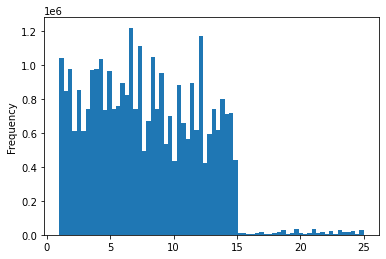

In [20]:
#increase granularity by increasing bins
ords_prods_merge['prices'].plot.hist(bins = 70)

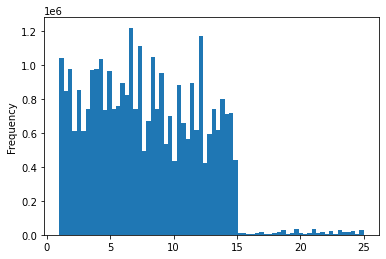

In [21]:
#save image as "hist"
hist = ords_prods_merge['prices'].plot.hist(bins = 70)

In [22]:
#save image to Visualizations folder
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

In [23]:
#sampling data to conserve memory/time but be representative of whole set
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [24]:
dev

array([False,  True, False, ..., False,  True,  True])

In [25]:
#big = true values(those <0.7) and small = false values (those >0.7)
big = ords_prods_merge[dev]
small = ords_prods_merge[~dev]

In [26]:
len(ords_prods_merge)

32434212

In [27]:
len(big) + len(small)

32434212

In [28]:
#save time and memory by only looking at needed columns for line chart
df_2 = small[['orders_day_of_week','prices']]

In [29]:
df_2.head()

,orders_day_of_week,prices
0,2,9.0
2,3,9.0
3,4,9.0
6,1,9.0
10,1,9.0


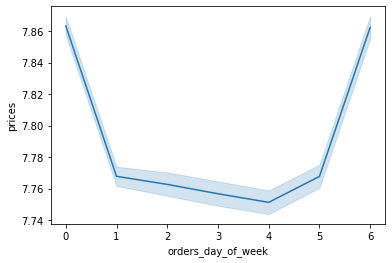

In [30]:
#create line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [31]:
#save image to Visualizations folder
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_dow.png'))

In [32]:
#export
ords_prods_merge.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_merged_derived_grouped(3).pkl'))